**Instantiating a small convnet**

**Copying images to training, validation, and test directories**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
!rm -rf '/content/Weather_dataset_new'

In [67]:
!rm -rf '/content/Weather-dataset'

In [68]:
!unzip -qq  '/content/drive/MyDrive/Colab_Notebooks/SECONDYEAR_TRIMESTER4_Module03_deep-learning-applications/DAY3_APPLICATION_OF_DEEP_LEARNING/Weather-dataset.zip'

In [69]:
import os, shutil, pathlib

original_dir = pathlib.Path("Weather-dataset/dataset_all")
new_base_dir = pathlib.Path("Weather_dataset_new")

def make_subset(subset_name, start_index, end_index):
      ind=-1
      for category in ("cloudy", "rain","shine","sunrise"):
        ind=ind+1
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}{i}.jpg" for i in range(start_index[ind], end_index[ind])]
        for fname in fnames:
          shutil.copyfile(src=original_dir / fname,dst=dir / fname)
  
make_subset("train", start_index=[1,1,1,1], end_index=[125,82,101,140])
make_subset("validation", start_index=[126,83,102,141], end_index=[175,142,152,217])
make_subset("test", start_index=[176,143,153,218], end_index=[301,216,254,358])

In [70]:
import tensorflow
from tensorflow import keras
from keras import layers

### Building the model

#FIRST APPROACH:**Instantiating a small convnet for dogs vs. cats classification**

In [71]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [72]:
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [73]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [74]:
import tensorflow as tf
image_dataset_from_directory=tf.keras.utils.image_dataset_from_directory
import os,shutil,pathlib
new_base_dir=pathlib.Path("/content/Weather_dataset_new")

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 444 files belonging to 4 classes.
Found 234 files belonging to 4 classes.
Found 439 files belonging to 4 classes.


**Fitting the model using a `Dataset`**

In [75]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]

In [76]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
14/14 [==============================] - 6s 178ms/step - loss: 1.3358 - sparse_categorical_accuracy: 0.4167 - val_loss: 0.8284 - val_sparse_categorical_accuracy: 0.5385
Epoch 2/30
14/14 [==============================] - 3s 144ms/step - loss: 0.9604 - sparse_categorical_accuracy: 0.5090 - val_loss: 0.8235 - val_sparse_categorical_accuracy: 0.5427
Epoch 3/30
14/14 [==============================] - 3s 140ms/step - loss: 0.8370 - sparse_categorical_accuracy: 0.6059 - val_loss: 0.7562 - val_sparse_categorical_accuracy: 0.6496
Epoch 4/30
14/14 [==============================] - 3s 204ms/step - loss: 1.3240 - sparse_categorical_accuracy: 0.6441 - val_loss: 0.6373 - val_sparse_categorical_accuracy: 0.6923
Epoch 5/30
14/14 [==============================] - 3s 141ms/step - loss: 0.7278 - sparse_categorical_accuracy: 0.6959 - val_loss: 0.6395 - val_sparse_categorical_accuracy: 0.6667
Epoch 6/30
14/14 [==============================] - 3s 143ms/step - loss: 0.6937 - sparse_categorica

# **Model Evaluation - First Approach**

**Evaluating the model on the test set**

In [77]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 1s 18ms/step - loss: 0.3682 - sparse_categorical_accuracy: 0.8718
Test accuracy: 0.872


**Displaying curves of loss and accuracy during training**

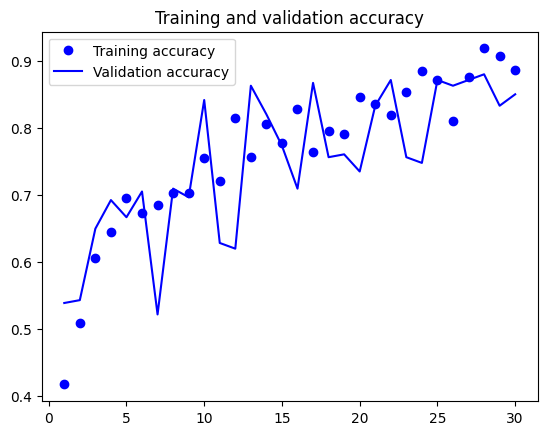

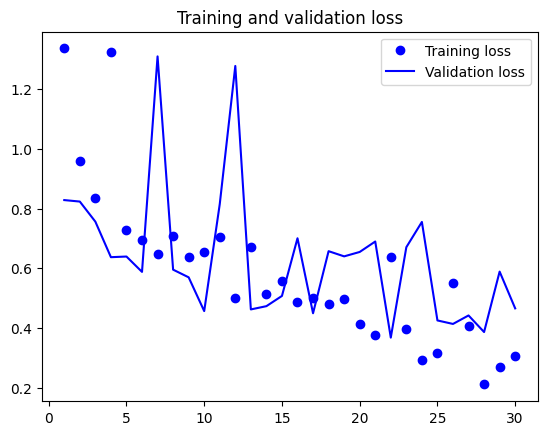

In [78]:
import matplotlib.pyplot as plt
accuracy = history.history["sparse_categorical_accuracy"]
val_accuracy = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#SECOND APPROACH:small convnet Using data augmentation

**Define a data augmentation stage to add to an image model**

In [79]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

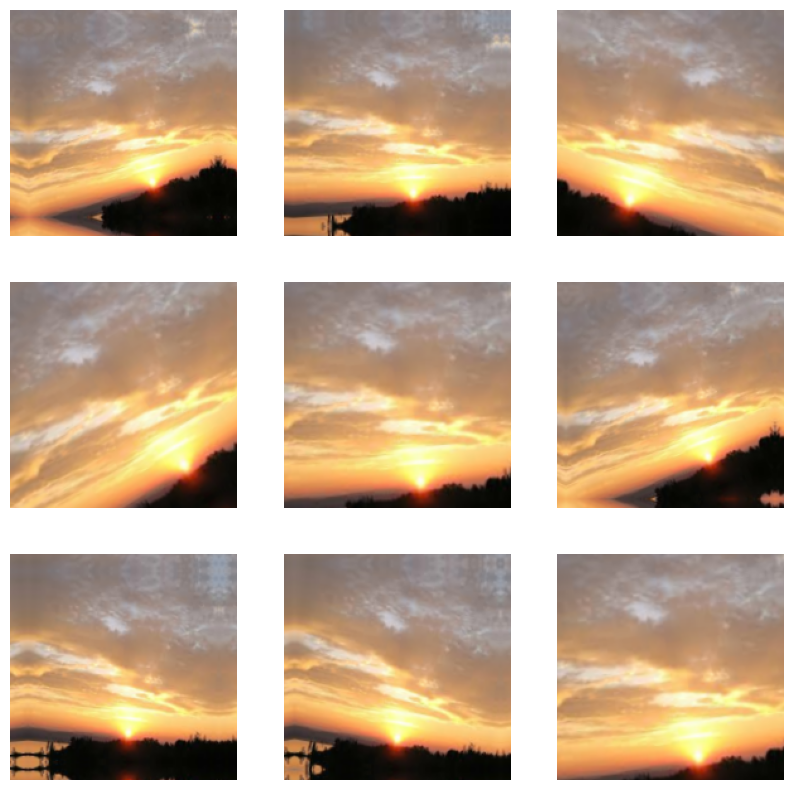

In [80]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [81]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

**Training the regularized convnet**

In [82]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
14/14 [==============================] - 5s 164ms/step - loss: 1.7675 - sparse_categorical_accuracy: 0.3626 - val_loss: 1.0557 - val_sparse_categorical_accuracy: 0.4530
Epoch 2/100
14/14 [==============================] - 3s 149ms/step - loss: 0.9655 - sparse_categorical_accuracy: 0.5180 - val_loss: 0.9046 - val_sparse_categorical_accuracy: 0.5256
Epoch 3/100
14/14 [==============================] - 4s 220ms/step - loss: 0.8592 - sparse_categorical_accuracy: 0.5495 - val_loss: 0.7906 - val_sparse_categorical_accuracy: 0.6667
Epoch 4/100
14/14 [==============================] - 3s 146ms/step - loss: 0.8041 - sparse_categorical_accuracy: 0.6261 - val_loss: 2.3821 - val_sparse_categorical_accuracy: 0.4145
Epoch 5/100
14/14 [==============================] - 4s 183ms/step - loss: 1.0963 - sparse_categorical_accuracy: 0.5338 - val_loss: 0.7599 - val_sparse_categorical_accuracy: 0.6838
Epoch 6/100
14/14 [==============================] - 4s 283ms/step - loss: 0.7427 - sparse_cate

# **Model Evaluation - Second Approach**

**Evaluating the model on the test set**

In [83]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 1s 17ms/step - loss: 0.3707 - sparse_categorical_accuracy: 0.8632
Test accuracy: 0.863


## Leveraging a pretrained model

#THIRD APPROACH: Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [84]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(180,180, 3))

In [85]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [86]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 25ms/step


In [87]:
train_features.shape

(444, 5, 5, 512)

In [88]:
val_features.shape

(234, 5, 5, 512)

In [89]:
test_features.shape

(439, 5, 5, 512)

**Defining and training the densely connected classifier**

In [90]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=50,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/50
14/14 [==============================] - 1s 20ms/step - loss: 16.3446 - sparse_categorical_accuracy: 0.7680 - val_loss: 2.9560 - val_sparse_categorical_accuracy: 0.9274
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 1.6244 - sparse_categorical_accuracy: 0.9617 - val_loss: 9.2917 - val_sparse_categorical_accuracy: 0.8462
Epoch 3/50
14/14 [==============================] - 0s 6ms/step - loss: 0.4734 - sparse_categorical_accuracy: 0.9820 - val_loss: 4.6255 - val_sparse_categorical_accuracy: 0.8974
Epoch 4/50
14/14 [==============================] - 0s 6ms/step - loss: 0.3293 - sparse_categorical_accuracy: 0.9842 - val_loss: 4.1193 - val_sparse_categorical_accuracy: 0.8974
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 0.2554 - sparse_categorical_accuracy: 0.9887 - val_loss: 5.2409 - val_sparse_categorical_accuracy: 0.9017
Epoch 6/50
14/14 [==============================] - 0s 6ms/step - loss: 0.6563 - sparse_categorical_accuracy

# **Model Evaluation - Third Approach**

In [91]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(val_features, val_labels)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 0s 3ms/step - loss: 2.9560 - sparse_categorical_accuracy: 0.9274
Test accuracy: 0.927


**Plotting the results**

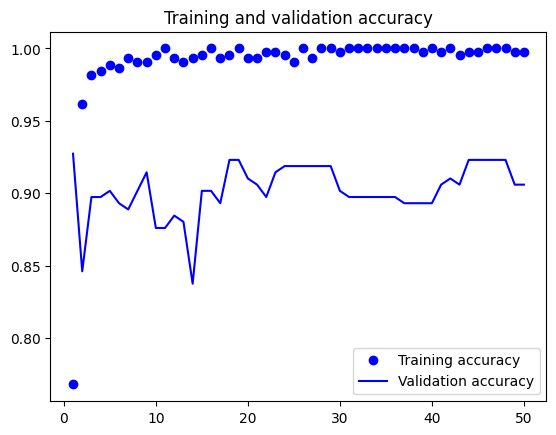

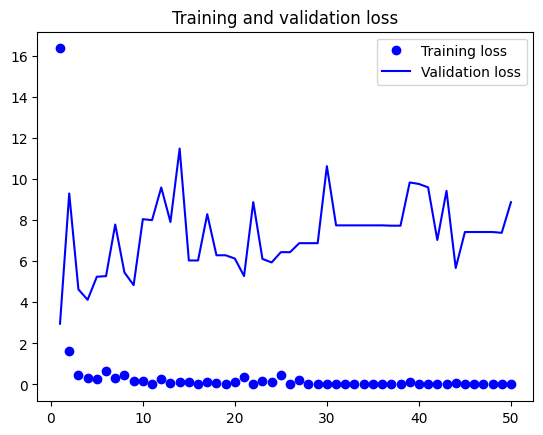

In [92]:
import matplotlib.pyplot as plt
acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#FOURTH APPROACH: Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [93]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [94]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [95]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [96]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["sparse_categorical_accuracy"])

In [101]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
14/14 [==============================] - 4s 241ms/step - loss: 0.4223 - sparse_categorical_accuracy: 0.9932 - val_loss: 18.1250 - val_sparse_categorical_accuracy: 0.9017
Epoch 2/50
14/14 [==============================] - 4s 224ms/step - loss: 0.1720 - sparse_categorical_accuracy: 0.9977 - val_loss: 18.2979 - val_sparse_categorical_accuracy: 0.9060
Epoch 3/50
14/14 [==============================] - 4s 270ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 1.0000 - val_loss: 18.2979 - val_sparse_categorical_accuracy: 0.9060
Epoch 4/50
14/14 [==============================] - 4s 225ms/step - loss: 2.9774e-07 - sparse_categorical_accuracy: 1.0000 - val_loss: 18.2845 - val_sparse_categorical_accuracy: 0.9060
Epoch 5/50
14/14 [==============================] - 4s 243ms/step - loss: 0.1847 - sparse_categorical_accuracy: 0.9932 - val_loss: 17.2320 - val_sparse_categorical_accuracy: 0.9017
Epoch 6/50
14/14 [==============================] - 5s 327ms/step - loss: 9.6393e-06 - 

# **Model Evaluation - Fourth Approach**

**Evaluating the model on the test set**

In [103]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 2s 92ms/step - loss: 14.0563 - sparse_categorical_accuracy: 0.8932
Test accuracy: 0.893


#FIFTH APPROACH: Fine-tuning a pretrained model

In [104]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [105]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [111]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["sparse_categorical_accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
14/14 [==============================] - 7s 336ms/step - loss: 0.1286 - sparse_categorical_accuracy: 0.9977 - val_loss: 14.2674 - val_sparse_categorical_accuracy: 0.9103
Epoch 2/30
14/14 [==============================] - 4s 245ms/step - loss: 0.1209 - sparse_categorical_accuracy: 0.9977 - val_loss: 21.1156 - val_sparse_categorical_accuracy: 0.8889
Epoch 3/30
14/14 [==============================] - 5s 324ms/step - loss: 0.1192 - sparse_categorical_accuracy: 0.9977 - val_loss: 15.6980 - val_sparse_categorical_accuracy: 0.9103
Epoch 4/30
14/14 [==============================] - 4s 246ms/step - loss: 4.4443e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 14.6609 - val_sparse_categorical_accuracy: 0.9060
Epoch 5/30
14/14 [==============================] - 5s 326ms/step - loss: 0.1219 - sparse_categorical_accuracy: 0.9955 - val_loss: 15.1700 - val_sparse_categorical_accuracy: 0.9103
Epoch 6/30
14/14 [==============================] - 4s 249ms/step - loss: 1.3156e-07 - spar

# **Model Evaluation - Fifth Approach**

In [112]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 2s 89ms/step - loss: 12.9456 - sparse_categorical_accuracy: 0.9103
Test accuracy: 0.910


# SIXTH APPROACH:ResNet50

In [113]:
resnet50 = keras.applications.resnet
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(180,180,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(4, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 186, 186, 3)  0           ['input_18[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 90, 90, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 90, 90, 64)   256         ['conv1_conv[0][0]']      

In [114]:
full_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=keras.optimizers.Adamax(),
                  metrics=['sparse_categorical_accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="ResNet50.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = full_model.fit(
    train_dataset, 
    validation_data = validation_dataset,
    workers=10,
    epochs=30

)

Epoch 1/30
14/14 [==============================] - 10s 272ms/step - loss: 2.5958 - sparse_categorical_accuracy: 0.7140 - val_loss: 1.0259 - val_sparse_categorical_accuracy: 0.8248
Epoch 2/30
14/14 [==============================] - 3s 197ms/step - loss: 0.1706 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.4741 - val_sparse_categorical_accuracy: 0.9145
Epoch 3/30
14/14 [==============================] - 4s 237ms/step - loss: 0.0286 - sparse_categorical_accuracy: 0.9887 - val_loss: 1.0216 - val_sparse_categorical_accuracy: 0.8803
Epoch 4/30
14/14 [==============================] - 5s 223ms/step - loss: 0.0024 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.7722 - val_sparse_categorical_accuracy: 0.9231
Epoch 5/30
14/14 [==============================] - 3s 195ms/step - loss: 6.4599e-04 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.5968 - val_sparse_categorical_accuracy: 0.9316
Epoch 6/30
14/14 [==============================] - 3s 199ms/step - loss: 3.0047e-05 - sparse_c

# **Model Evaluation - Sixth Approach using ResNet50**

In [115]:
test_loss, test_acc = full_model.evaluate(validation_dataset)
print(f"Test accuracy: {test_acc:.3f}")

8/8 [==============================] - 1s 67ms/step - loss: 0.5853 - sparse_categorical_accuracy: 0.9359
Test accuracy: 0.936


## Summary

In [118]:
!jupyter nbconvert --to html BA09_Module_12_Assignment_1_AnandMohan.ipynb

[NbConvertApp] Converting notebook BA09_Module_12_Assignment_1_AnandMohan.ipynb to html
[NbConvertApp] Writing 1686861 bytes to BA09_Module_12_Assignment_1_AnandMohan.html
